In [82]:
import warnings; warnings.simplefilter('ignore')

from matplotlib import pyplot as plt

from numpy import mean, std, cov
from numpy.random import randn, seed, rand

from scipy.stats import pearsonr, spearmanr, kendalltau

# For the following examples:

##### Using Scipy.stats imported functions for ease of use.
##### Do not use these without first understanding the basis of what they do.
##### General basis explained below.

## Nonparametric Rank Correlation Test Data Set

In [2]:
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)

In [3]:
seed(1)

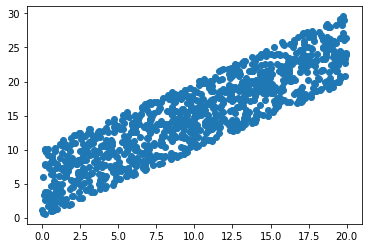

In [4]:
plt.scatter(data1, data2)
plt.show()

### Spearman's Rank Correlation (Spearman's rho)

##### Rank-order statistical procedure designed to measure the relationship between two variables on an ordinal scale. Of note, the variables are associated via monotonicity.

##### Calculates a Perason's correlation using rank values instead of real values; Pearson's details the covariance normalized by the variance.

In [5]:
# spearmanr() takes two real-valued samples and 
# returns the coefficient along with the p-value

coef, p = spearmanr(data1, data2)

print("Spearman's correlation coefficient: %0.3f" % coef)

# still need to define alpha
alpha = 0.05

if p > alpha:
    print('Uncorrelated samples. Fail to reject H0. p = %0.3f' % p)
else:
    print('Correlated samples. Reject H0. p = %0.3f' % p)

Spearman's correlation coefficient: 0.897
Correlated samples. Reject H0. p = 0.000


### Kendall's Rank Correlation (Kendall's tau)

##### Calculates a normalized score for the number of concordant rankings between the two samples.

##### kendalltau() takes two samples and 
##### returns the coefficient along with the p-value

##### Let H_0 be defined as no association between the two samples.

In [6]:
coef, p = kendalltau(data1, data2)
print("Kendall's correlation coefficient: %0.3f" % coef)

alpha = 0.05

if p > alpha:
    print('Uncorrelated samples. Fail to reject H0. p = %0.3f' % p)
else:
    print('Correlated samples. Reject H0. p = %0.3f' % p)

Kendall's correlation coefficient: 0.706
Correlated samples. Reject H0. p = 0.000


## Covariance and Correlation Test Data Set

In [7]:
seed(1)

In [8]:
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)

In [9]:
print('data1: mean = %0.3f stdv = %0.3f' % (mean(data1), std(data1)))
print('data2: mean = %0.3f stdv = %0.3f' % (mean(data2), std(data2)))

data1: mean = 100.776 stdv = 19.620
data2: mean = 151.050 stdv = 22.358


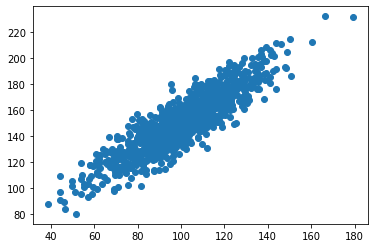

In [10]:
plt.scatter(data1, data2)
plt.show()

##### cov(X, Y) = sum[(x - mean(x)) * (y - mean(y))] * 1/(n-1)

In [11]:
covariance = cov(data1, data2)
print(f'Covariance matrix of data1 and data 2: \n {covariance}')

Covariance matrix of data1 and data 2: 
 [[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


### Pearson's Correlation Coefficient

##### Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y)

##### Is the normalization of the covariance between two variables. Implies a Gaussian or Gaussian-like distribution.

In [12]:
# pearsonr() works on data sets of the same length.

corr, _ = pearsonr(data1, data2)
print('This is using data1 and data2 from the correlation and covariance test set.')
print("Pearson's correlation coefficient: corr = %0.3f" % corr)

This is using data1 and data2 from the correlation and covariance test set.
Pearson's correlation coefficient: corr = 0.888


### Spearman's Correleation Coefficient

##### Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))

##### Distribution is not assumed. Linearity of relationship is not assumed. Monotonicty is assumed. Common with non-parametric statistics; methods where the distribution is not assumed.

In [13]:
# spearmanr() works on data sets of the same length.

corr, _ = spearmanr(data1, data2)
print('This is using data1 and data2 from the correlation and covariance test set.')
print("Spearman's correlation coefficient: corr = %0.3f" % corr)

This is using data1 and data2 from the correlation and covariance test set.
Spearman's correlation coefficient: corr = 0.872


## Machine Learning Stuff

### Using Covariance and Correlation test data where applicable.

# For the following examples:

##### Using Statsmodels.tsa.ar_model imported functions for ease of use.
##### Do not use these without first understanding the basis of what they do.
##### General basis explained below.

### Autoregression (AR)

##### Models the next step in the sequence as a linear function of the observations at prior time steps.

##### Suitable for univaraite time series without trend and seasonal components

In [14]:
from statsmodels.tsa.ar_model import AR
from random import random

In [15]:
# seed = random()
# data = [x + seed for x in range(1, 100)]

In [16]:
model = AR(data1)
model_fit = model.fit()
# print(model_fit.summary()) not implemented

In [17]:
yhat = model_fit.predict(len(data1), len(data1))
print(yhat)

[100.50923524]


# For the following examples:

##### Using Statsmodels.tsa.arima_model imported functions for ease of use.
##### Do not use these without first understanding the basis of what they do.
##### General basis explained below.

### Moving Average (MA)

##### Models the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps. Note: This is different from calculatinf the moving average of the time series.

##### Suitable for univaraite time series without trend and seasonal components

In [18]:
from statsmodels.tsa.arima_model import ARMA
from random import random

In [19]:
# seed = random()
# data = [x + seed for x in range(1, 100)]

In [20]:
model = ARMA(data1, order=(0, 1))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -4395.073
Method:                       css-mle   S.D. of innovations             19.612
Date:                Tue, 19 Nov 2019   AIC                           8796.146
Time:                        15:34:27   BIC                           8810.869
Sample:                             0   HQIC                          8801.742
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.7755      0.603    167.259      0.000      99.595     101.956
ma.L1.y       -0.0285      0.031     -0.915      0.360      -0.090       0.033
                                    Roots           

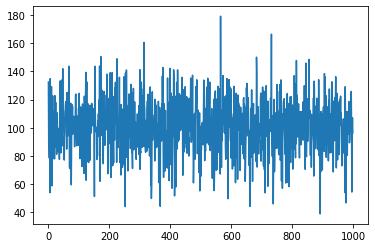

In [21]:
plt.plot(data1)
plt.show()

In [22]:
yhat = model_fit.predict(len(data1), len(data1))
print('This is using data1 and data2 from the correlation and covariance test set.')
print('yhat: ', yhat)

This is using data1 and data2 from the correlation and covariance test set.
yhat:  [100.89920878]


### Autoregressigve Moving Average (ARMA)

##### Combines AR and MA models

##### Suitable for univaraite time series without trend and seasonal components

In [23]:
from statsmodels.tsa.arima_model import ARMA
from random import random

In [24]:
# seed = random()
# data = [x + seed for x in range(1, 100)]

In [25]:
model = ARMA(data1, order=(0, 1)) # order > 0th has a seasonal root for the random data. 2nd should be used.
model_fit = model.fit(disp=False)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -4395.073
Method:                       css-mle   S.D. of innovations             19.612
Date:                Tue, 19 Nov 2019   AIC                           8796.146
Time:                        15:34:28   BIC                           8810.869
Sample:                             0   HQIC                          8801.742
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.7755      0.603    167.259      0.000      99.595     101.956
ma.L1.y       -0.0285      0.031     -0.915      0.360      -0.090       0.033
                                    Roots           

This is using data1 and data2 from the correlation and covariance test set.


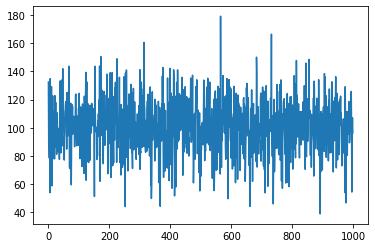

In [26]:
plt.plot(data1)
print('This is using data1 and data2 from the correlation and covariance test set.')
plt.show()

In [27]:
yhat = model_fit.predict(len(data1), len(data1))
print('yhat: ', yhat)

yhat:  [100.89920878]


### Autoregressive Integrated Moving Average (ARIMA)

##### Combines AR and MA as well as differencing pre-proessing of the sequence to induce stationary behaviour, called integration (I).

##### Suitable for univariate time series with trend and without seasonal components

In [28]:
from statsmodels.tsa.arima_model import ARIMA
from random import random

In [29]:
# seed = random()
# data = [x + seed for x in range(1, 100)]

In [30]:
model = ARIMA(data1, order=(1, 1, 1))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  999
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4394.477
Method:                       css-mle   S.D. of innovations             19.618
Date:                Tue, 19 Nov 2019   AIC                           8796.954
Time:                        15:34:28   BIC                           8816.581
Sample:                             1   HQIC                          8804.414
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.002     -0.579      0.563      -0.005       0.003
ar.L1.D.y     -0.0288      0.032     -0.909      0.364      -0.091       0.033
ma.L1.D.y     -1.0000      0.003   -377.070      0.0

In [31]:
yhat = model_fit.predict(len(data1), len(data1))
print('yhat: ', yhat)

yhat:  [4.02543622]


# For the following examples:

##### Using Statsmodels.tsa.statespace.sarimax imported functions for ease of use.
##### Do not use these without first understanding the basis of what they do.
##### General basis explained below.

### Seasonal Autoregressive Integrated Moving-Average (SARIMA)

##### Combines ARIMA with autogregression, differencing, and moving average modeling at the seasonal level.

##### Suitable for univatiate time series with trend and/or seasonal components.

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

In [33]:
# data = [x + random() for x in range(1, 100)]

In [34]:
model = SARIMAX(data1, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                 1000
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 1)   Log Likelihood               -4399.906
Date:                           Tue, 19 Nov 2019   AIC                           8809.812
Time:                                   15:34:29   BIC                           8834.341
Sample:                                        0   HQIC                          8819.135
                                          - 1000                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0141      0.016     -0.904      0.366      -0.045       0.016
ma.L1         -0.9979      0.009   -109.604

This is using data1 and data2 from the correlation and covariance test set.


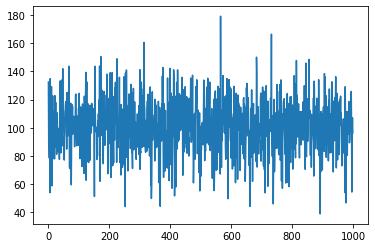

In [35]:
plt.plot(data1)
print('This is using data1 and data2 from the correlation and covariance test set.')
plt.show()

In [36]:
yhat = model_fit.predict(len(data1), len(data1))
print('yhat: ', yhat)

yhat:  [100.31723113]


### Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

##### Extension of SARIMA that includes modeling of exogenous (covariate) variables. The observations for exogenous variables are inluded in the model directly at each time step and are not modeled the same way as the primary endogenous sequence

##### Suitable for univariate time series with trend, and/or seasonal components, and exogenous variables. 

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

In [38]:
# data1 = [x + random() for x in range(1, 100)]
# data2 = [x + random() for x in range(101, 200)]

In [39]:
model = SARIMAX(data1, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3620.430
Date:                Tue, 19 Nov 2019   AIC                           7248.860
Time:                        15:34:30   BIC                           7268.487
Sample:                             0   HQIC                          7256.320
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7785      0.013     59.867      0.000       0.753       0.804
ar.L1         -0.0176      0.032     -0.548      0.584      -0.081       0.045
ma.L1         -1.0000      0.923     -1.083      0.2

This is using data1 and data2 from the correlation and covariance test set.


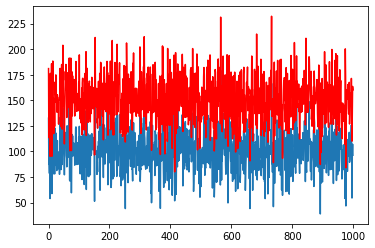

In [40]:
print('This is using data1 and data2 from the correlation and covariance test set.')
plt.plot(data1)
plt.plot(data2, color='red')
plt.show()

In [41]:
exog2 = [200 + random()]
yhat = model_fit.predict(len(data1), len(data2), exog=[exog2])
print('yhat: ', yhat)

yhat:  [139.36789865]


# For the following examples:

##### Using Statsmodels.tsa.vector_ar.var_model imported functions for ease of use.
##### Do not use these without first understanding the basis of what they do.
##### General basis explained below.

### Vector Autoregression (VAR)

##### Models the next step in each time series using an AR model; generalized AR to multiple parallel series.

##### Suitable for multivariate time series without trend and seasonal components.

In [42]:
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random

In [43]:
data = list()
for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)

In [44]:
model = VAR(data)
model_fit = model.fit()
print(model_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 19, Nov, 2019
Time:                     15:34:30
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -4.47431
Nobs:                     99.0000    HQIC:                  -4.56795
Log likelihood:          -45.6862    FPE:                 0.00973964
AIC:                     -4.63159    Det(Omega_mle):      0.00917514
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         1.088307         0.106992           10.172           0.000
L1.y1         1.167538         0.142754            8.179           0.000
L1.y2        -0.167669         0.142796           -1.174           0.240

Results for equation 

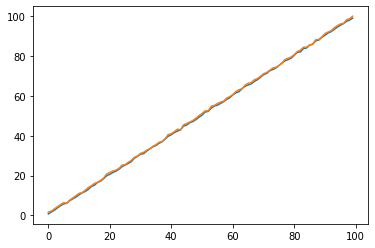

In [45]:
plt.plot(data)
plt.show()

In [46]:
yhat = model_fit.forecast(model_fit.endog, steps = 1)
print('yhat: ', yhat)

yhat:  [[100.02775005 100.56221567]]


# For the following examples:

##### Using Statsmodels.tsa.varmax imported functions for ease of use.
##### Do not use these without first understanding the basis of what they do.
##### General basis explained below.

### Vector Autoregression Moving-Average (VARMA)

##### Models the next step in each time series using an ARMA model; generalized ARMA to multiple parallel series.

##### Suitable for multivariate time series without trend and seasonal components.

In [47]:
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random

In [48]:
data = list()
for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)

In [83]:
model = VARMAX(data, order=(1, 1)) # Note: Swap for more robust VARMAX
model_fit = model.fit(disp=False)
print(model_fit.summary())

                           Statespace Model Results                           
Dep. Variable:           ['y1', 'y2']   No. Observations:                  100
Model:                     VARMA(1,1)   Log Likelihood                -152.158
                          + intercept   AIC                            330.317
Date:                Tue, 19 Nov 2019   BIC                            364.184
Time:                        15:34:55   HQIC                           344.023
Sample:                             0                                         
                                - 100                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):               154.45, 34.99   Jarque-Bera (JB):           3.61, 3.34
Prob(Q):                        0.00, 0.69   Prob(JB):                   0.16, 0.19
Heteroskedasticity (H):         0.90, 0.82   Skew:                     -0.40, -0.13
Prob(H) (two-sided):            0.76,

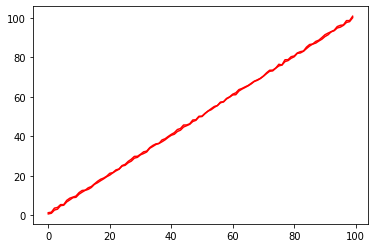

In [50]:
plt.plot(data, color='red')
plt.show()

In [84]:
yhat = model_fit.forecast()
print('yhat: ', yhat)

yhat:  [[100.36002749 101.00239234]]


### Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)

##### Extension of VARMA to include modeling of exogenous variables (covariates); multivariate ARMAX.

##### Suitable for multivariate time series without trend and seasonal components with exogenous variables.

In [52]:
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random

In [53]:
data = list()
for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
    data_exog = [x + random() for x in range(100)]

In [85]:
model = VARMAX(data, exog=data_exog, order=(1, 1))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                           Statespace Model Results                           
Dep. Variable:           ['y1', 'y2']   No. Observations:                  100
Model:                    VARMAX(1,1)   Log Likelihood                 -62.884
                          + intercept   AIC                            155.767
Date:                Tue, 19 Nov 2019   BIC                            194.845
Time:                        15:35:04   HQIC                           171.582
Sample:                             0                                         
                                - 100                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                38.68, 38.84   Jarque-Bera (JB):           2.89, 3.65
Prob(Q):                        0.53, 0.52   Prob(JB):                   0.24, 0.16
Heteroskedasticity (H):         0.76, 0.86   Skew:                     -0.29, -0.16
Prob(H) (two-sided):            0.45,

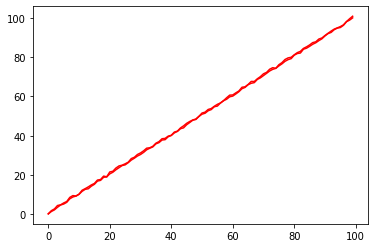

In [55]:
plt.plot(data, color='red')
plt.show()

In [86]:
data_exog2 = [[100]]
yhat = model_fit.forecast(exog=data_exog2)
print('yhat: ', yhat)

yhat:  [[ 99.97203732 100.55241612]]


# For the following examples:

##### Using Statsmodels.tsa.holtwinters imported functions for ease of use.
##### Do not use these without first understanding the basis of what they do.
##### General basis explained below.

### Simple Exponential Smoothing (SES)

##### Models the next time step as an exponentially weighted linear function of observations at prior time steps.

##### Suitable for univariate time series without trend and seasonal components.

In [57]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random

In [58]:
# data = [x + random() for x in range(1, 100)]

In [59]:
model = SimpleExpSmoothing(data1)
model_fit = model.fit()
print(model_fit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                 1000
Model:             SimpleExpSmoothing   SSE                         384947.644
Optimized:                       True   AIC                           5957.107
Trend:                           None   BIC                           5966.923
Seasonal:                        None   AICC                          5957.148
Seasonal Periods:                None   Date:                 Tue, 19 Nov 2019
Box-Cox:                        False   Time:                         15:34:33
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level             0.000000                alpha                 True
initial_level              100.77624                

This is using data1 and data2 from the correlation and covariance test set.


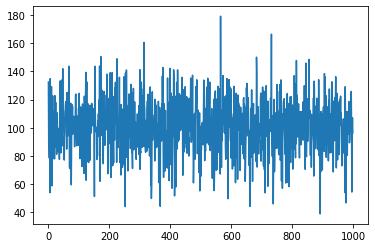

In [60]:
print('This is using data1 and data2 from the correlation and covariance test set.')
plt.plot(data1)
plt.show()

In [61]:
yhat = model_fit.predict(len(data1), len(data1))
print('yhat: ', yhat)

yhat:  [100.77624259]


### Holt Winter's Exponential Smoothing (HWES)

##### Aka "Triple Exponential Smoothing", models the next step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.

##### Suitable for univariate time series with trend and/or seasonal components.

In [62]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random

In [63]:
# data = [x + random() for x in range(1, 100)]

In [64]:
model = ExponentialSmoothing(data1)
model_fit = model.fit()
print(model_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                 1000
Model:             ExponentialSmoothing   SSE                         384947.644
Optimized:                         True   AIC                           5957.107
Trend:                             None   BIC                           5966.923
Seasonal:                          None   AICC                          5957.148
Seasonal Periods:                  None   Date:                 Tue, 19 Nov 2019
Box-Cox:                          False   Time:                         15:34:33
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level             0.000000                alpha                 True
initial_level              100.776

This is using data1 and data2 from the correlation and covariance test set.


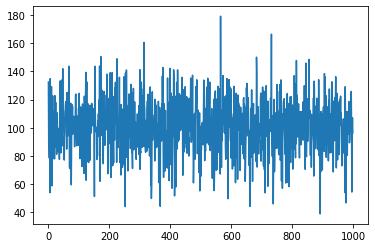

In [65]:
print('This is using data1 and data2 from the correlation and covariance test set.')
plt.plot(data1)
plt.show()

In [66]:
yhat = model_fit.predict(len(data1), len(data1))
print('yhat: ', yhat)

yhat:  [100.77624259]


## Logistic Regression with Maximum Likelihood Estimation

## Logistic Regression

##### Classical linear method for binary classification; classification predictive modeling fpr a given set of input variables.

##### Not to be confused with linear regression which predicts a numerical value, although both model the target variable using a line or a hyperplane depending on the dimensionality. Linear fits to the data, logistic fits to the best separation.

##### Input is denoted as `X` with `n` samples, output is denoted as `y`. The prediction is denoted as `yhat`.

##### yhat = model(X)

##### Model is defined in terms of parameters called coefficients (`beta`) with one `beta` per input and an additional coefficient to provide the intercept or bias.

##### yhat = beta_0 + beta_1 * x_1 + ... + beta_m * x_m
##### or
##### y = X * `Beta`

##### Let the logistic function be defined as f(x). Then, 
##### f(x) = 1 / (1 + exp(-x)). 
##### In the case of logictic regression, 
##### yhat = 1 / (1 + exp(-(X * Beta))).
##### Where the output is interpreted as a probability from a Binomial probability distribution for the class labelled as 1 (out of labels 0 and 1).

### Logistic Regression and Log Odds

##### The linear part of the model calculates the `log-odds` of a successful event, i.e. that a sample belongs to class 1.
##### log-odds = sum(beta_0 + beta_i * x_i) for i from 1 to m.

##### odds = p / (1 - p), log-odds = log(p / (1 - p))
##### => p = odds / (odds + 1) and p = 1 / (1 + exp(-log-odds))

##### From math import exp, log

##### Let probability = 0.8.

In [67]:
from math import exp, log

In [68]:
# Example probability
prob = 0.8
print('Probability: %0.3f' % prob)
odds = prob / (1 - prob)
print('Odds: %0.3f' % odds)
prob = odds / (odds + 1)
print('Probability: %0.3f' % prob)

Probability: 0.800
Odds: 4.000
Probability: 0.800


##### By extension

In [69]:
# By extension
prob = 0.8
print('Probability: %0.3f' % prob)
odds = prob / (1 - prob)
print('Odds: %0.3f' % odds)
logodds = log(odds)
print('Log-odds: %0.3f' % logodds)
prob = 1 / (1 + exp(-logodds))
print('Probability: %0.3f' % prob)

Probability: 0.800
Odds: 4.000
Log-odds: 1.386
Probability: 0.800


### Maximum Likelihood Estimation

##### Maximize the conditional probablity of observing `X` given parameters `theta`, defined as
##### P(X; theta) or P(x_1, x_2, ..., x_n; theta)

##### The resulting conditional probability, known as the likelihood of observing X given theta, is given by
##### L(X; theta)

##### Restating this as the sum of the log conditional probability, we have
##### sum(log( P(x_i; theta))) for i from 1 to n.

##### Optimization then involves minimizing the cost (loss) function. In this way, the negative log likelihood (NLL) is used instead, and is given by
##### minimize (-sum(log( P(x_i; theta)))) for i from 1 to n.

### Logistic Regression as Maximum Likelihood

##### Framing the ML model as a probability density problem, where instead of theta, we have the hypothesis `h` that maximizes L(X; theta), we have
##### maximize (sum(log( P(x_i; h)))) for i from 1 to n.

##### Supervised learning can be framed in this way as well, given the input
##### P(y | X)
##### We can define the conditional maximum likelihood for supervised machine learning as
##### maximize (sum(log( P(y_i | x_i; h)))) for i from 1 to n.

##### The catch for maximum likelihood is that a probability distribution must be assumed. Therefore, for logistic regression, a Binomial probability distribution is assumed; a single parameter defining the probability of a successful outcome.
##### P(y=1) = p
##### P(y=0) = 1 - p

##### The mean is then given by
##### mean = P(y=1) * 1 + P(y=0) * 0
##### or, with a given p
##### mean = p * 1 + (1 - p) * 0

##### Then, given a particular input, we can extend that to
##### likelihood = yhat * y + (1 - yhat) * (1 - y)

##### Here, the likelihood is manually defined. Use of the function gives us the following:

In [70]:
def likelihood(y, yhat):
    return yhat * y + (1 - yhat) * (1 - y)

y, yhat = 1, 0.9
print('y = %0.3f, yhat = %0.3f, likelihood: %0.3f' %(y, yhat, likelihood(y, yhat)))
y, yhat = 1, 0.1
print('y = %0.3f, yhat = %0.3f, likelihood: %0.3f' %(y, yhat, likelihood(y, yhat)))
y, yhat = 0, 0.1
print('y = %0.3f, yhat = %0.3f, likelihood: %0.3f' %(y, yhat, likelihood(y, yhat)))
y, yhat = 0, 0.9
print('y = %0.3f, yhat = %0.3f, likelihood: %0.3f' %(y, yhat, likelihood(y, yhat)))

y = 1.000, yhat = 0.900, likelihood: 0.900
y = 1.000, yhat = 0.100, likelihood: 0.100
y = 0.000, yhat = 0.100, likelihood: 0.900
y = 0.000, yhat = 0.900, likelihood: 0.100


##### Moreover,

In [71]:
# Moreover
def loglikelihood(y, yhat):
    return log(yhat) * y + log(1 - yhat) * (1 - y)

y, yhat = 1, 0.9
print('y = %0.3f, yhat = %0.3f, loglikelihood: %0.3f' %(y, yhat, loglikelihood(y, yhat)))
y, yhat = 1, 0.1
print('y = %0.3f, yhat = %0.3f, loglikelihood: %0.3f' %(y, yhat, loglikelihood(y, yhat)))
y, yhat = 0, 0.1
print('y = %0.3f, yhat = %0.3f, loglikelihood: %0.3f' %(y, yhat, loglikelihood(y, yhat)))
y, yhat = 0, 0.9
print('y = %0.3f, yhat = %0.3f, loglikelihood: %0.3f' %(y, yhat, loglikelihood(y, yhat)))

y = 1.000, yhat = 0.900, loglikelihood: -0.105
y = 1.000, yhat = 0.100, loglikelihood: -2.303
y = 0.000, yhat = 0.100, loglikelihood: -0.105
y = 0.000, yhat = 0.900, loglikelihood: -2.303


##### Finally, we can sum the function across all values in the dataset to give the maximum likelihood as
##### maximize (sum(log(yhat_i) * y_i + log(1 - yhat) * (1 - y) for i from 1 to n.

##### However, it is common practice to minimize the cost (loss) function for optimization and rewrite this as
##### minimize (-sum(log(yhat_i) * y_i + log(1 - yhat) * (1 - y) for i from 1 to n.

##### Of particular interest, calculating -(log-likelihood) for the Bernoulli distribution is equivalent to calculating the cross-entropy function for the Bernoulli distribution.
##### cross-entropy = -(log(q(class_0)) * p(class_0) + log(q(class_1)) * p(class_1))
##### where q() is the estimation of the probability distribution and p() is the probability of class_0 or class_1.

##### Unfortunately, there is not an analytical solution to this optimization problem, therefore an iterative one must be used instead. For this, the gradient and the Hessian would need to be derived.

## Autocorrelation and Partial Autocorrelation for Time Series

# For the following examples:

##### Using Statsmodels.graphics.tsaplots imported functions for ease of use.
##### Do not use these without first understanding the basis of what they do.
##### General basis explained below.

In [72]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### AutoCorrelation

##### Example using `plot_acf()` and daily minimmum of temperatures from 1981 to 1990.

In [73]:
series = pd.read_csv('daily-min-temperatures.csv', header = 0, index_col = 0)
print('series read in as a dataframe of the daily minimum temperatures spanning 1981 to 1990.')
series.head()

series read in as a dataframe of the daily minimum temperatures spanning 1981 to 1990.


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


## ...

In [74]:
series.tail()

,Temp
Date,
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5
1990-12-30,15.7
1990-12-31,13.0


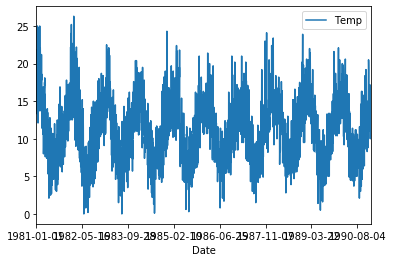

In [75]:
series.plot()
plt.show()

3000 lags


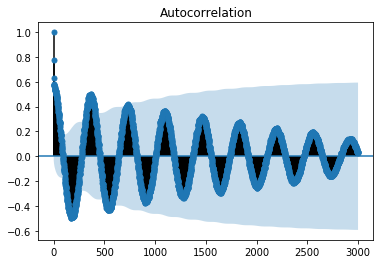

In [76]:
print('3000 lags')
plot_acf(series, lags=3000)
plt.show()

50 lags


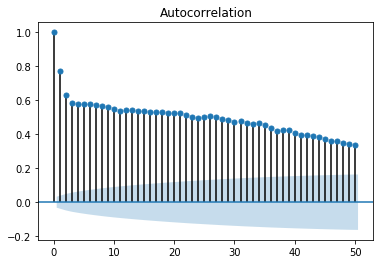

In [77]:
print('50 lags')
plot_acf(series, lags=50)
plt.show()

100 lags


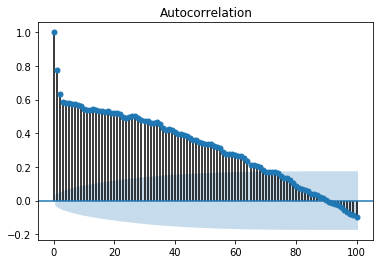

In [78]:
print('100 lags')
plot_acf(series, lags = 100)
plt.show()

### Partial AutoCorrelation

##### Example using `plot_pacf()` and the daily minumum of temperatures from 1980 to 1990.

In [79]:
series.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


## ...

In [80]:
series.tail()

,Temp
Date,
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5
1990-12-30,15.7
1990-12-31,13.0


50 lags


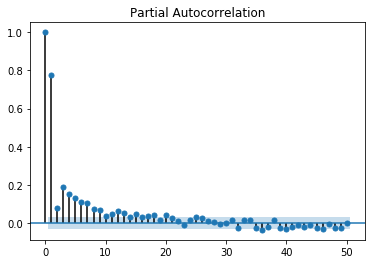

In [81]:
print('50 lags')
plot_pacf(series, lags = 50)
plt.show()

In [93]:
!jupyter nbconvert --to=html time_series_and_stats_cheat_sheet.ipynb

[NbConvertApp] Converting notebook time_series_and_stats_cheat_sheet.ipynb to html
[NbConvertApp] Writing 1530379 bytes to time_series_and_stats_cheat_sheet.html


In [95]:
from IPython.display import display, HTML

with open('time_series_and_stats_cheat_sheet.html') as f:
    display(HTML(f.read()))

FileNotFoundError: [Errno 2] No such file or directory: 'time_series_and_stats_cheat_sheet.html'